<a href="https://colab.research.google.com/github/Elma-dev/hands_in_keras/blob/main/MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



---
#**<center>MNIST Data Set</center>**

---
<center>
MNIST (70,000 grayscale images of 28×28 pixels each, with 10 classes),
</center>

## **Using Keras to Load the Dataset**

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

In [3]:
#load data
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(f'shape(x_train,y_train)={x_train_full.shape,y_train_full.shape}')
print(f'shape(x_test,y_test)={x_test.shape,y_test.shape}')

shape(x_train,y_train)=((60000, 28, 28), (60000,))
shape(x_test,y_test)=((10000, 28, 28), (10000,))


Note that the dataset is already split into a training set and a test set, but there is no
validation set, so let’s create one.

In [5]:
#Add valid data and in the same time normalization the images
x_train_valid,x_train=x_train_full[:5000]/255,x_train_full[5000:]/255
y_train_valid,y_train=y_train_full[:5000],y_train_full[5000:]

type of classes in **MNIST** data

In [6]:
print(f'MnistClasses:{np.sort(pd.unique(y_train))}')

MnistClasses:[0 1 2 3 4 5 6 7 8 9]


#**Creating the Model Using the Sequential API**

**<center>Code Lines Meaning:</center>**


---
- The first line creates a **Sequential model**. This is the simplest kind of Keras
model, for neural networks that are just composed of a single stack of layers, con‐
nected sequentially. This is called the sequential API.

- Next, we build the first layer and add it to the model. It is a **Flatten laye**r whose role is simply to **convert each input image into a 1D array**: if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters, it is just there to do some simple preprocessing. Since it is the first layer in the model,
you should specify the input_shape: this does not include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, setting shape=[28,28].

- Next we add a **Dense hidden layer with 300 neurons**. It will use the **ReLU** activa‐tion function. Each Dense layer manages its own weight matrix, containing all the
connection weights between the neurons and their inputs.

- Next we add a second **Dense hidden layer with 100 neurons**, also using the **ReLU** activation function.

- Finally, we add a **Dense output layer with 10 neurons** (one per class), using the **softmax** activation function (because the classes are exclusive).
---



In [7]:
from keras.api._v2.keras import activations
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


The model’s **summary()** method displays all the model’s layers

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


**layers**: You can easily get a model’s list of layers:

In [9]:
model.layers

In [10]:
model.get_layer("dense_1")

In [11]:
model.get_layer("dense_1").get_weights() # set_weights()

[array([[-0.03013723,  0.03887296, -0.06371844, ..., -0.06684712,
         -0.04003805,  0.11039976],
        [ 0.07556849, -0.0094314 ,  0.05895308, ..., -0.00903653,
         -0.09421831, -0.06102598],
        [ 0.06690591, -0.06645824,  0.03801132, ...,  0.00410359,
          0.01641084,  0.03213937],
        ...,
        [-0.03289852, -0.08594116,  0.07660919, ..., -0.04878038,
          0.0537648 ,  0.00287174],
        [ 0.09295437, -0.07076105, -0.0550167 , ...,  0.00710502,
          0.01782738, -0.0423236 ],
        [-0.01308648, -0.03163949,  0.0592295 , ...,  0.05970908,
         -0.04501849, -0.08840732]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

## **Compiling the Model**


After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can also specify a list of extra metrics to compute during training and evaluation.

---
<center>Code Explanation</center>

- This requires some explanation. First, we use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0.,0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need
to use the "categorical_crossentropy" loss instead. If we were doing binary classi‐fication (with one or more binary labels), then we would use the "sigmoid" (i.e.,logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

- Secondly, regarding the optimizer, "sgd" simply means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the backpropagation algorithm described earlier (i.e., reverse-mode autodiff + Gradient Descent). We will discuss more efficient optimizers in Chapter 11 (they improve the Gradient Descent part, not the autodiff).

- Finally, since this is a classifier, it’s useful to measure its "accuracy" during training and evaluation

---

In [12]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

## **Training and Evaluating the Model**

---
Now the model is ready to be trained. For this we simply need to call its **fit()** method. We pass it the input features (X_train) and the target classes (y_train), as well as the ***number of epochs*** to train (or else it would default to just 1, which would
definitely not be enough to converge to a good solution). ***We also pass a validation*** set (this is optional): ***Keras will measure the loss and the extra metrics on this set at the end of each epoch,*** which is very useful to see how well the model really performs: if
the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set)

---

In [28]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_train_valid,y_train_valid))

Epoch 1/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1353 - accuracy: 0.9524 - val_loss: 0.3330 - val_accuracy: 0.8840
Epoch 2/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1337 - accuracy: 0.9530 - val_loss: 0.3000 - val_accuracy: 0.8980
Epoch 3/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1311 - accuracy: 0.9535 - val_loss: 0.3077 - val_accuracy: 0.8980
Epoch 4/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1292 - accuracy: 0.9550 - val_loss: 0.3182 - val_accuracy: 0.8982
Epoch 5/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1274 - accuracy: 0.9547 - val_loss: 0.3425 - val_accuracy: 0.8920
Epoch 6/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1251 - accuracy: 0.9557 - val_loss: 0.4012 - val_accuracy: 0.8658
Epoch 7/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1231 - accuracy: 0.9567 - val_loss: 0.3341 - val_accura

## **Show Training History**


---


***history.history*** : this attribute save all values of loss/accuracy in training operation


---



In [30]:
pd.DataFrame(history.history).tail()

,loss,accuracy,val_loss,val_accuracy
45,0.062436,0.978855,0.397187,0.8914
46,0.062880,0.979600,0.389207,0.8968
47,0.061674,0.979255,0.385041,0.8994
48,0.060248,0.979873,0.407584,0.8902
49,0.060635,0.979400,0.468189,0.8882


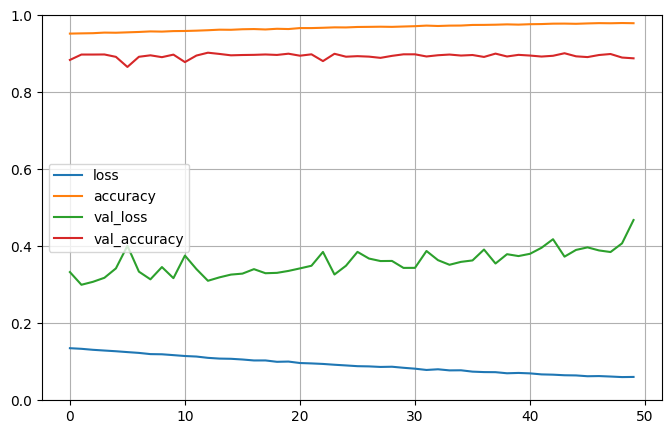

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

## **Evalute The Model**

In [33]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 165.3930 - accuracy: 0.8187


[165.3929901123047, 0.8187000155448914]

## **Using the Model to Make Predictions**

In [38]:
model.predict(x_test[:9]).round(2) #probabilities

1/1 [==============================] - 0s 52ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

#**Building a Regression MLP Using the Sequential API**

---

- MLP : MACHINE LEARNING PROCESSES

- In this section we work in the ***California Houses data***

- To load this data we use SkitLearnAPI

- This dataset is simpler, since it contains only numerical features (there is no ocean_proximity feature), and
there is no missing value.

---




In [39]:
from sklearn.datasets import fetch_california_housing #dataAPI
from sklearn.model_selection import train_test_split #data spliter
from sklearn.preprocessing import StandardScaler #dataScaler

In [53]:
#load data
housing=fetch_california_housing()

In [62]:
features=pd.DataFrame(data=housing.data,columns=housing.feature_names)
target=pd.DataFrame(data=housing.target,columns=housing.target_names)
data=pd.concat([features,target],axis=1)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [73]:
#dataSplite
X=data.iloc[:,:8].values
Y=data.iloc[:,8].values
Xtrainfull,Xtest,Ytrainfull,Ytest=train_test_split(X,Y,test_size=0.2)

In [74]:
#addValidationStep
Xtrain,Xvalid,Ytrain,Yvalid=train_test_split(Xtrainfull,Ytrainfull,test_size=0.2)

In [75]:
#featuresScaling
scaler=StandardScaler()
XtrainScal=scaler.fit_transform(Xtrain)
XvalidScal=scaler.transform(Xvalid)
XtestScal=scaler.transform(Xtest)

## **Build MLP**

In [78]:
mlpModel=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=Xtrain.shape[1:]),
    keras.layers.Dense(1)
])

In [79]:
mlpModel.compile(optimizer="sgd",loss="mean_squared_error")

In [80]:
mlpModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [81]:
mllpHistory=mlpModel.fit(XtrainScal,Ytrain,epochs=20,validation_data=(XvalidScal,Yvalid))

Epoch 1/20
413/413 [==============================] - 2s 3ms/step - loss: 0.8329 - val_loss: 0.5603
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.5490 - val_loss: 0.5069
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4705 - val_loss: 0.4842
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4512 - val_loss: 0.4771
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4390 - val_loss: 0.4550
Epoch 6/20
413/413 [==============================] - 1s 3ms/step - loss: 0.4295 - val_loss: 0.4809
Epoch 7/20
413/413 [==============================] - 1s 3ms/step - loss: 0.4230 - val_loss: 0.4477
Epoch 8/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4161 - val_loss: 0.4367
Epoch 9/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4249 - val_loss: 0.4330
Epoch 10/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4256 - val_loss: 0.4360

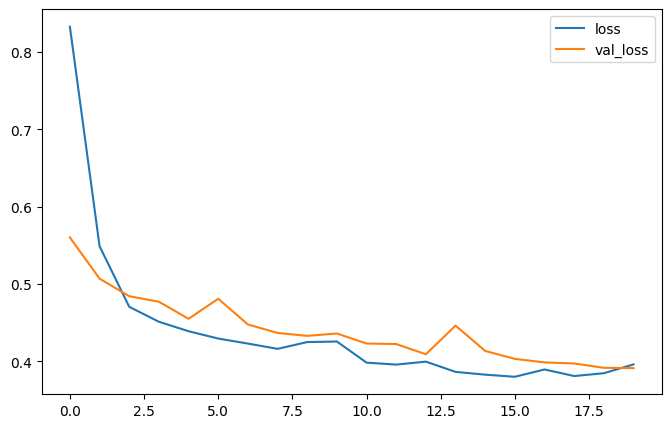

In [84]:
pd.DataFrame(mllpHistory.history).plot(figsize=(8,5))
plt.show()

In [88]:
mlpModel.evaluate(XtestScal,Ytest)

129/129 [==============================] - 0s 2ms/step - loss: 0.3743


0.37425824999809265